# Logistic Regression(Titanic Dataset)

In [1]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
df = pd.read_csv("train_net.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Refering to the description of the data set above we observe

1. There are few missing vales in Age feature which is needed to be fixed

2. We need to drop the features which doesnt carry least information

In [5]:
#Removing features which contains very less fields and carries no information
df = df.drop("Cabin", axis = 1)
df = df.drop("PassengerId", axis = 1)
df = df.drop("Ticket", axis = 1)
df = df.drop("Name", axis = 1)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
#correlation of entire data frame
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


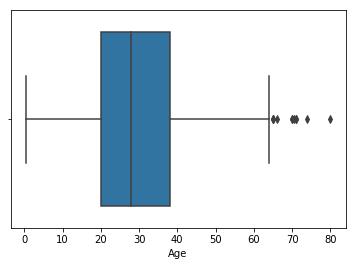

In [8]:
sns.boxplot(df['Age'])

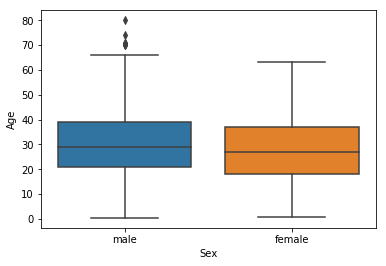

In [9]:
sns.boxplot(df['Sex'], df['Age'])

In [10]:
#df['Age'].mean()
df['Age'].median()

28.0

In [11]:
df['Age'].mean()

29.69911764705882

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([24., 16., 10., 12.,  6.,  9., 23., 39., 41., 66., 55., 36., 47.,
        62., 33., 41., 31., 21., 18., 23., 21., 16., 13.,  9.,  9.,  7.,
         7.,  8.,  4.,  0.,  3.,  2.,  1.,  0.,  1.]),
 array([ 0.42      ,  2.69371429,  4.96742857,  7.24114286,  9.51485714,
        11.78857143, 14.06228571, 16.336     , 18.60971429, 20.88342857,
        23.15714286, 25.43085714, 27.70457143, 29.97828571, 32.252     ,
        34.52571429, 36.79942857, 39.07314286, 41.34685714, 43.62057143,
        45.89428571, 48.168     , 50.44171429, 52.71542857, 54.98914286,
        57.26285714, 59.53657143, 61.81028571, 64.084     , 66.35771429,
        68.63142857, 70.90514286, 73.17885714, 75.45257143, 77.72628571,
        80.        ]),
 <a list of 35 Patch objects>)

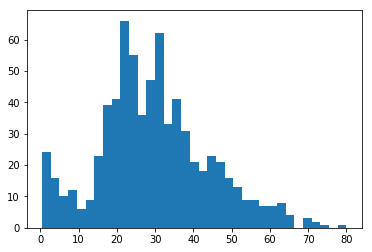

In [12]:
plt.hist(df['Age'], bins = 35)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


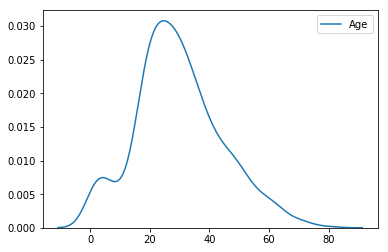

In [13]:
sns.kdeplot(df['Age'])

From the above two plots we can observe "Age" feature is normally distributed across the mean.

In [14]:
#Imputing mean of age for missing observations
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].mean()

29.699117647058763

In [15]:
#data info after imputing missing values for "Age" feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
#finding the correlation between each predictor / feature
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


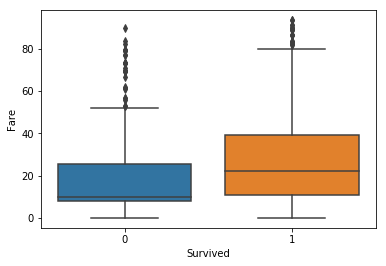

In [17]:
#Box Plot to visualize the Survived and not survived among different ranges of Fare
data_sam = df[df['Fare'] < 100]
sns.boxplot(data_sam['Survived'], data_sam['Fare'])

In [18]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

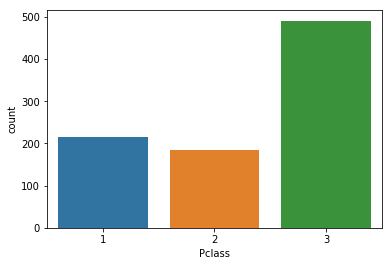

In [19]:
sns.countplot(df['Pclass'])
#plotting the count of persons travelled in each class

Note : There are more number of passengers in Class3 compared to Class1 and Class2 which is of higher fare

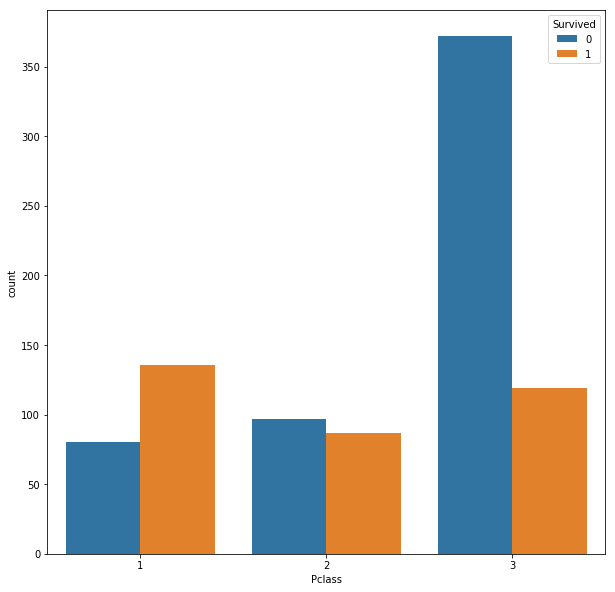

In [20]:
#Count Plot to visualize Survived and Not Survived among the three classes
plt.figure(figsize = (10, 10))
sns.countplot(df['Pclass'], hue = df['Survived'])

If we notice the above plot carefully there are more number of passengers who did not survive travelling in Class3 compared to Class1 and Class2 which means the passengers travelling in Class 1 and Class 2 have more probability to survive this disaster. 

In [21]:
def Convert_to_str(integer):
    return str(integer)

In [22]:
df['Pclass'] = df['Pclass'].apply(Convert_to_str)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Text(0, 0.5, 'Count')

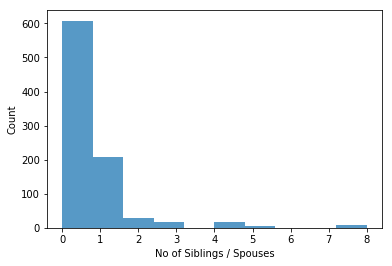

In [24]:
#Histogram to plot the number of Siblings / Spouses.
plt.hist(df['SibSp'], alpha = 0.75)
plt.xlabel('No of Siblings / Spouses')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

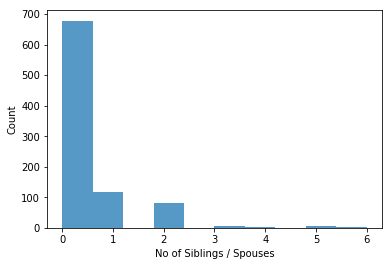

In [25]:
#Histogram to plot the number of Parents / Childrens.
plt.hist(df['Parch'], alpha = 0.75)
plt.xlabel('No of Siblings / Spouses')
plt.ylabel('Count')

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
#Creating Dummies for Sex and Pclass
data = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True )

In [28]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [29]:
data.corr()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
Survived,1.000000,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.093349,-0.322308,0.003650,-0.155660
Age,-0.069809,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.006589,-0.281004,-0.013855,-0.027121
SibSp,-0.035322,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.055932,0.092548,-0.026354,0.070941
Parch,0.081629,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.000734,0.015790,-0.081228,0.063036
Fare,0.257307,0.091566,0.159651,0.216225,1.000000,-0.182333,-0.118557,-0.413333,-0.117216,-0.166603
Sex_male,-0.543351,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.064746,0.137143,-0.074115,0.125722
Pclass_2,0.093349,0.006589,-0.055932,-0.000734,-0.118557,-0.064746,1.000000,-0.565210,-0.127301,0.192061
Pclass_3,-0.322308,-0.281004,0.092548,0.015790,-0.413333,0.137143,-0.565210,1.000000,0.237449,-0.009511
Embarked_Q,0.003650,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,-0.127301,0.237449,1.000000,-0.496624
Embarked_S,-0.155660,-0.027121,0.070941,0.063036,-0.166603,0.125722,0.192061,-0.009511,-0.496624,1.000000


In [30]:
#data.drop('PassengerId', axis = 1, inplace = True)

In [31]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [32]:
data.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [33]:
X = data[['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S']]

In [34]:
y = data['Survived']

# Model Training

In [35]:
#Importing required Machine Learning Modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [37]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

In [39]:
confusion_matrix

Predicted,0,1
Actual,,
0,146,22
1,31,69


In [40]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8022388059701493


In [41]:
#Model Score
logistic_regression.score(X,y) 

0.8069584736251403

### 1. Perform regression and fit model to predict the values for the data in test data set.


In [42]:
test = pd.read_csv("test.csv")

In [43]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [45]:
#Imputing mean to test data(29.699117647058763)
test['Age'] = test['Age'].fillna(29.699117647058763)

In [46]:
test['Age'].count()

418

In [47]:
#Dropping Cabin, PassengerId, Name, Ticket features as it carries no information
test = test.drop("Cabin", axis = 1)
test = test.drop("PassengerId", axis = 1)
test = test.drop("Ticket", axis = 1)
test = test.drop("Name", axis = 1)

In [48]:
#Creating Dummies for Sex, Pclass and Embarked
test = pd.get_dummies(test, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True )

In [49]:
test.dropna(inplace = True)

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 9 columns):
Age           417 non-null float64
SibSp         417 non-null int64
Parch         417 non-null int64
Fare          417 non-null float64
Sex_male      417 non-null uint8
Pclass_2      417 non-null uint8
Pclass_3      417 non-null uint8
Embarked_Q    417 non-null uint8
Embarked_S    417 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 18.3 KB


# Predicting Test data

In [51]:
predictions = logistic_regression.predict(test)

In [52]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [53]:
#Converting the predictions array to Data Frame
df_pred = pd.DataFrame(data = predictions, columns = ['Survived'])

In [54]:
df_pred.head()

,Survived
0,0
1,0
2,0
3,0
4,1


### 2. Predicting Survived using Gender / Sex Feature

In [55]:
Gender_df = df[['Sex', 'Survived']]

In [56]:
Gender_df.head()

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


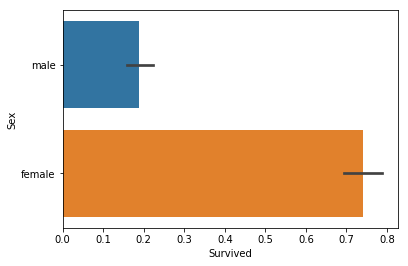

In [57]:
#Bar Plot to visualize Survived Class in each Sex
sns.barplot(Gender_df['Survived'], Gender_df['Sex'])

The above plot shows us the probability of Female being survived is more compared to Male. We have proven the same numerically below.

In [58]:
Male = Gender_df[Gender_df['Sex'] == 'male']

In [59]:
Male.head()

,Sex,Survived
0,male,0
4,male,0
5,male,0
6,male,0
7,male,0


In [60]:
Male[Male['Survived'] == 1].count()

Sex         109
Survived    109
dtype: int64

In [61]:
Female = Gender_df[Gender_df['Sex'] == 'female']
Female[Female['Survived'] == 1].count()

Sex         233
Survived    233
dtype: int64

In [62]:
Gender_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [63]:
#Probability
print("Probability of Male being Survived : ", (109 / 577) * 100)
print("Probability of Female being Survived : ", (233 / 314) * 100)

Probability of Male being Survived :  18.890814558058924
Probability of Female being Survived :  74.20382165605095


The above graphical and numerical analysis tells us Probability of Male being Survived is 18.89 % whereas Probability of Female being survived is 74.20 %

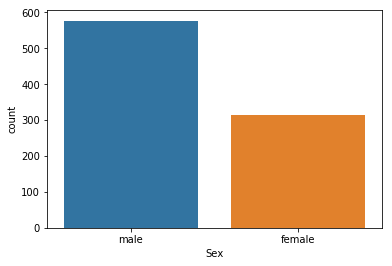

In [64]:
#Count Plot to show the number of male and number of female onboarded
sns.countplot(Gender_df['Sex'])

In [65]:
#Creating Dummies for 'sex' predictor
data_Gender = pd.get_dummies(Gender_df, columns=['Sex'], drop_first=True )
data_Gender.head()

,Survived,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [66]:
pred = data_Gender['Sex_male']
resp = data_Gender['Survived']

In [67]:
#Converting to dataframe
pred_df = pd.DataFrame(data=pred, columns = ['Sex_male'])
resp_df = pd.DataFrame(data=resp, columns = ['Survived'])

In [68]:
X_train,X_test,y_train,y_test = train_test_split(pred_df,resp_df,test_size=0.3,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
predictions=logistic_regression.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
print('Accuracy: ',metrics.accuracy_score(y_test, predictions))

Accuracy:  0.7873134328358209


In [70]:
logistic_regression.score(pred_df, resp_df) 

0.7867564534231201

From the above analysis and fit we conculde that feature "Sex"(Gender) carries most of the information in the model fit and is considered as the best predictor.